Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
cm = pd.read_csv('Company_Data.csv')
cm.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cm.shape

(400, 11)

In [5]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
cm[cm.duplicated()].shape

(0, 11)

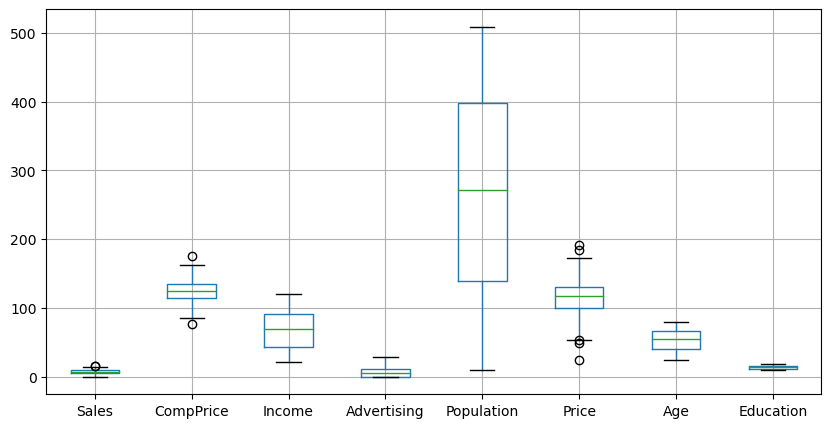

In [7]:
plt.figure(figsize=(10,5))
cm.boxplot()
plt.show()

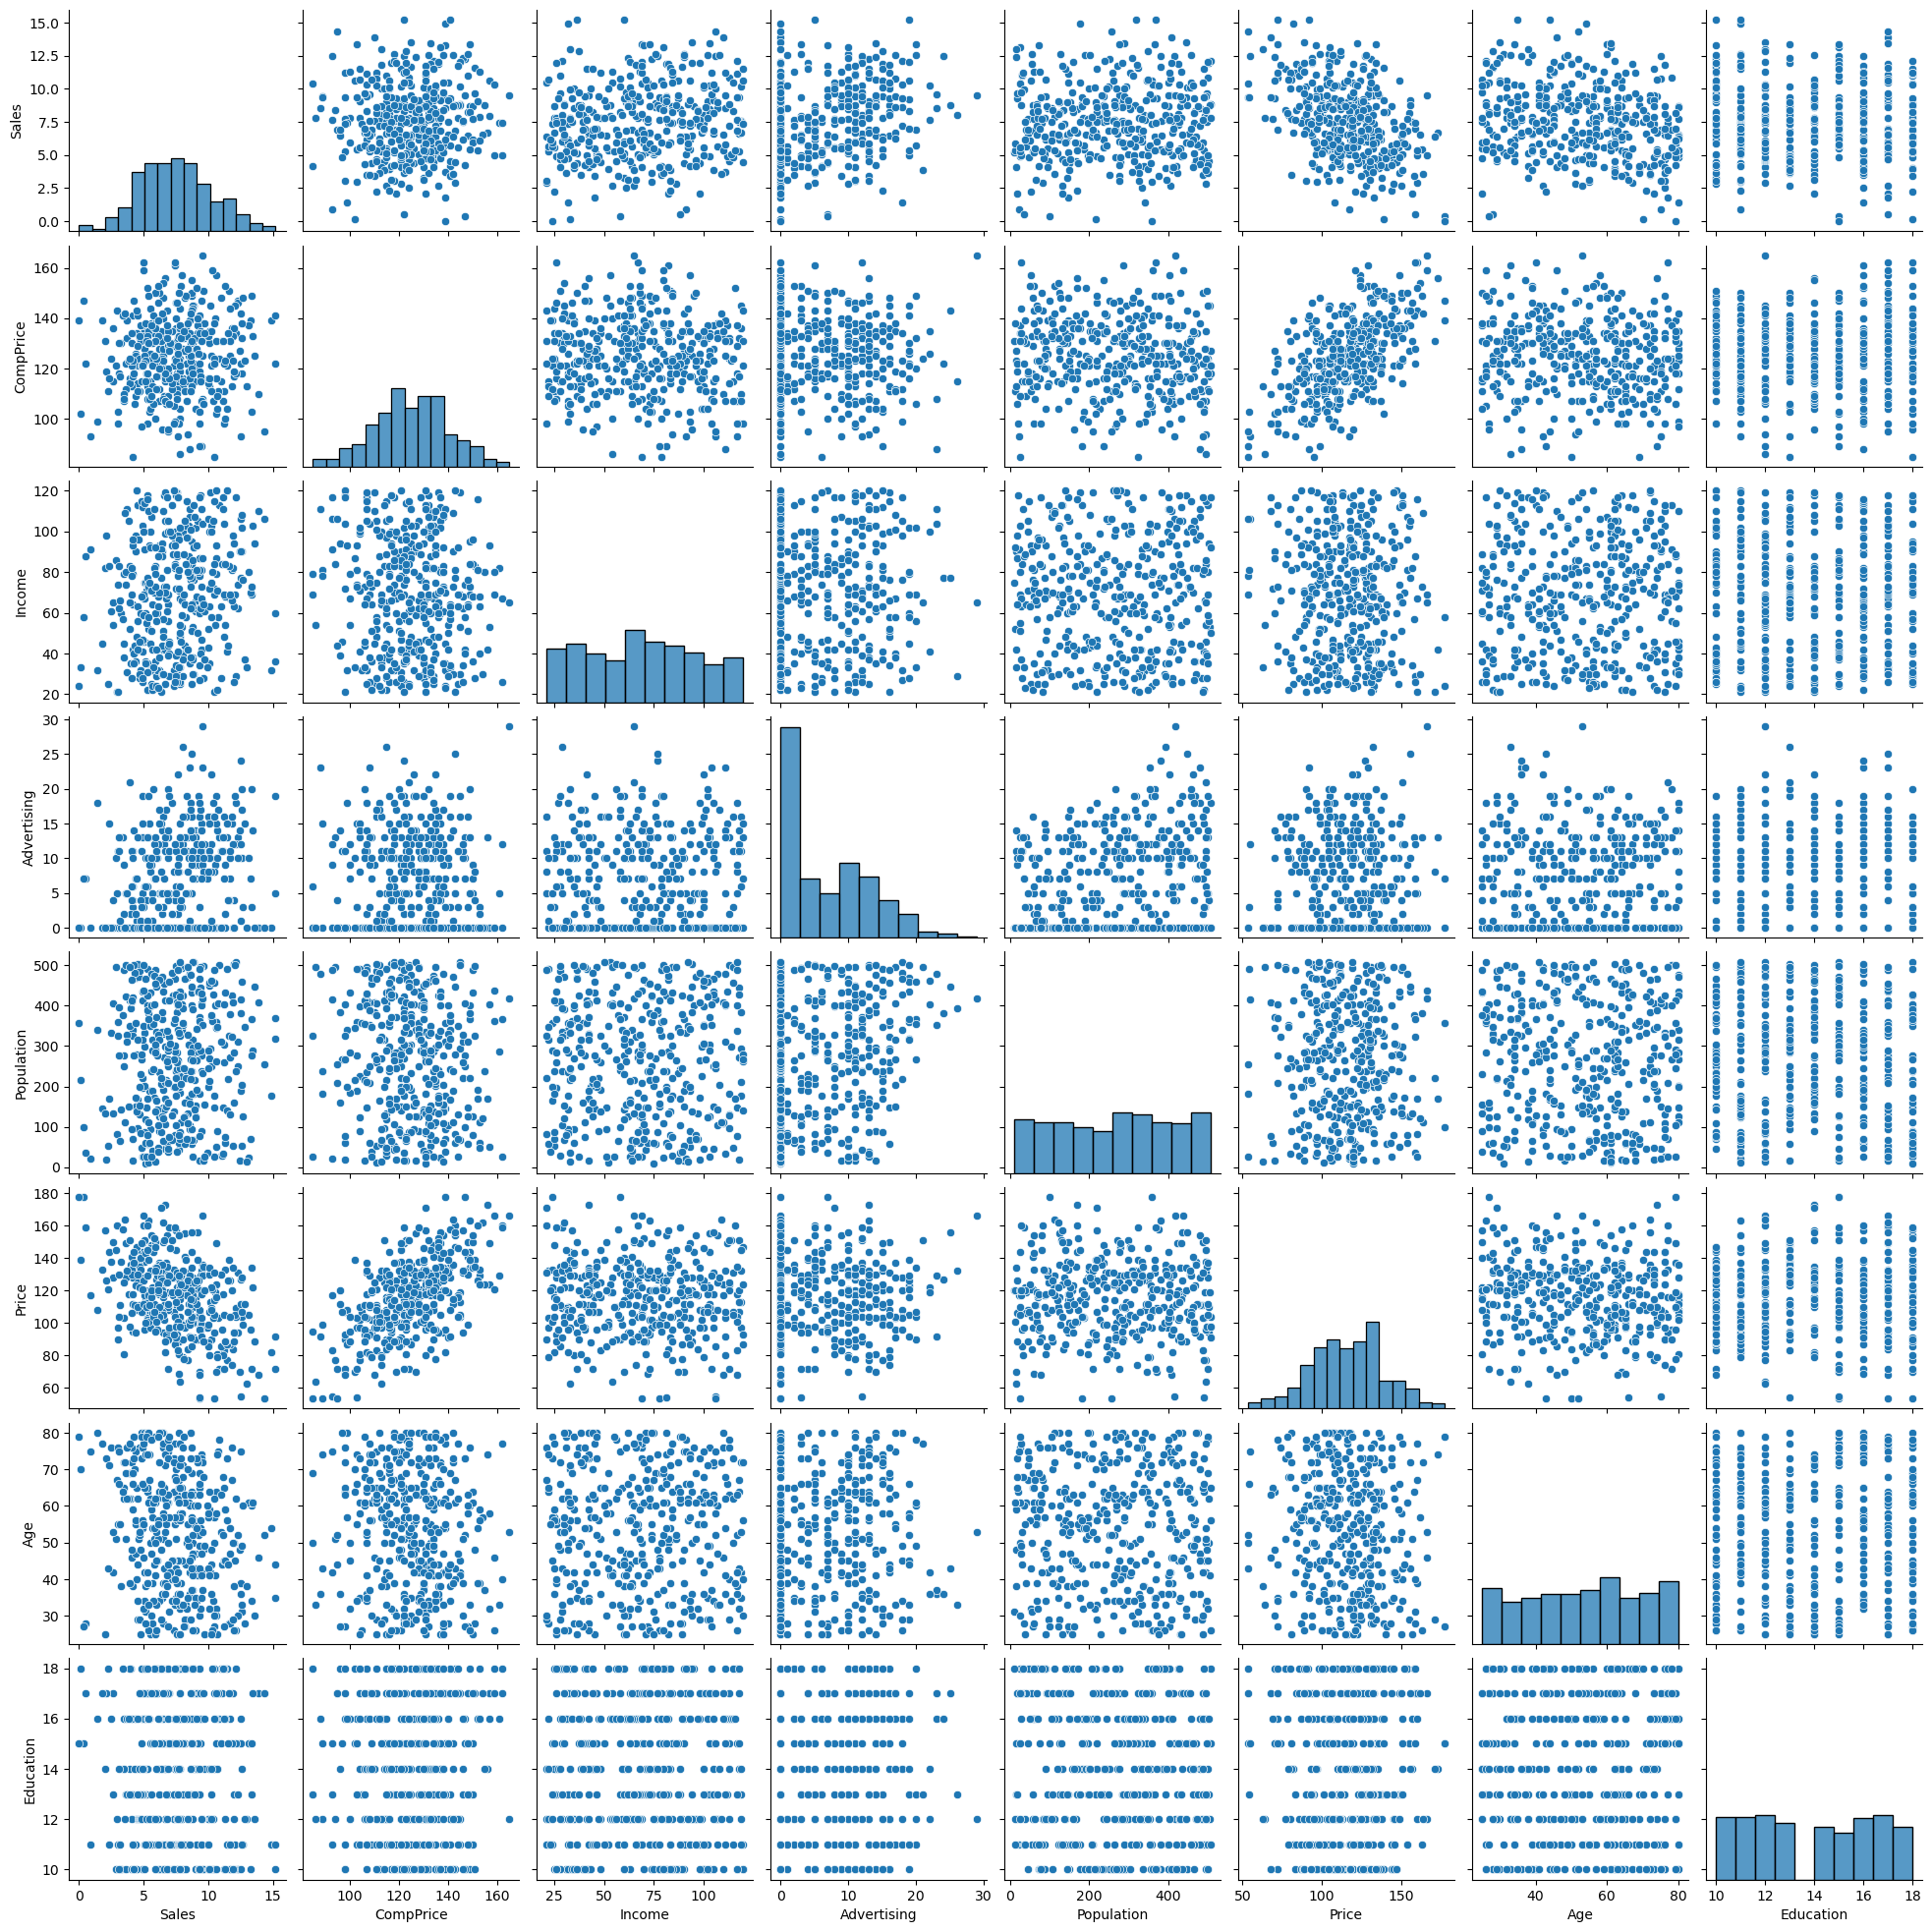

In [12]:
sns.pairplot(cm)

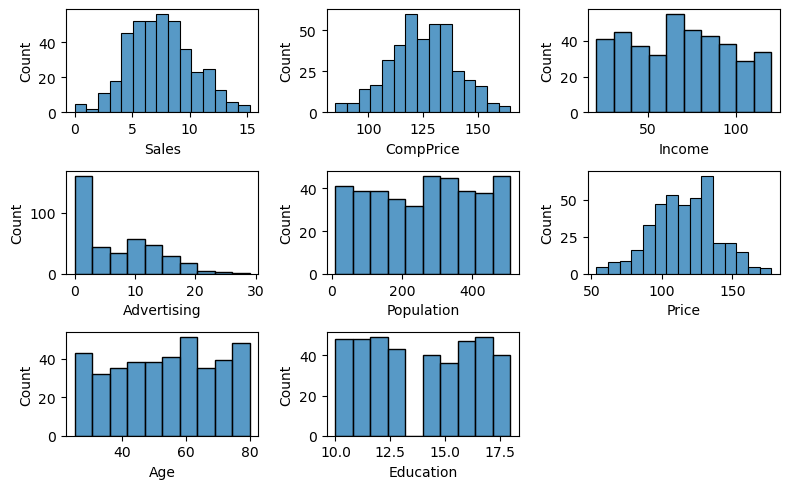

In [14]:
import matplotlib.pyplot as plt
c=3
r=3
col=cm.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(8,5))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=cm[co],ax=axis)
size.tight_layout()
plt.show()

In [8]:
cols = cm.columns
def treat_outliers(cm,cols):
    for col in cols:
        Q1 = cm[col].quantile(0.25)
        Q3 = cm[col].quantile(0.75)
        IQR = Q3 - Q1
        
        upper = Q3+1.5*IQR
        lower = Q1-1.5*IQR
        
        cm[col]=np.where(cm[col]>upper,upper,np.where(cm[col]<lower,lower,cm[col]))

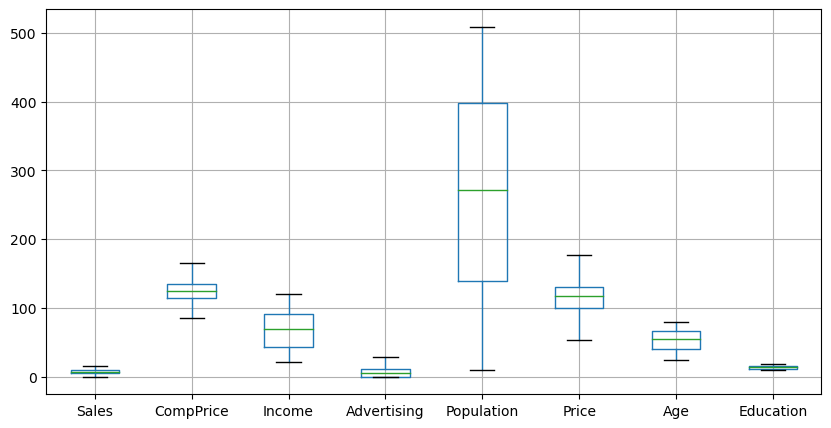

In [10]:
plt.figure(figsize=(10,5))
cm.boxplot()
plt.show()

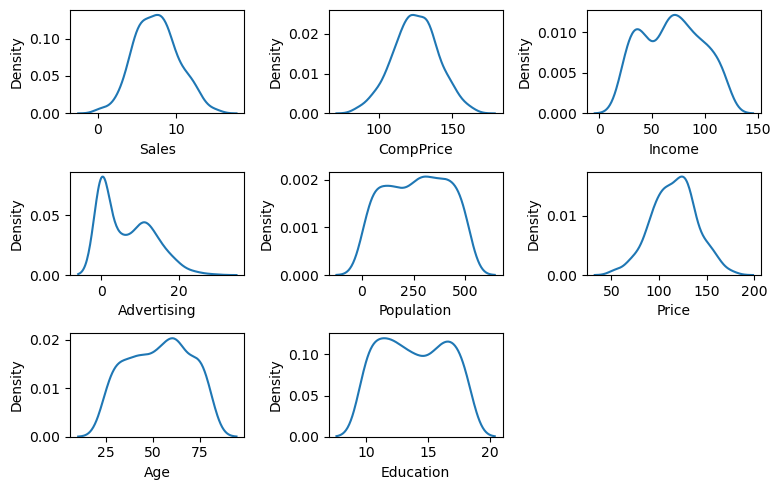

In [15]:
import matplotlib.pyplot as plt
c=3
r=3
col=cm.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(8,5))
for i,co in enumerate(col):
    axis=size.add_subplot(r,c,i+1)
    sns.kdeplot(x=cm[co],ax=axis)
size.tight_layout()
plt.show()

In [17]:
cm['Sales'].describe()

count    400.000000
mean       7.492650
std        2.813453
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       15.215000
Name: Sales, dtype: float64

In [18]:
cm['sales'] = 0
cm.loc[cm['Sales'] > 7.49, 'sales'] = 1
cm.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138.0,73.0,11.0,276.0,120.0,Bad,42,17,Yes,Yes,1
1,11.22,111.0,48.0,16.0,260.0,83.0,Good,65,10,Yes,Yes,1
2,10.06,113.0,35.0,10.0,269.0,80.0,Medium,59,12,Yes,Yes,1
3,7.40,117.0,100.0,4.0,466.0,97.0,Medium,55,14,Yes,Yes,0
4,4.15,141.0,64.0,3.0,340.0,128.0,Bad,38,13,Yes,No,0


In [19]:
label_encoder = LabelEncoder()
cm['Urban'] = label_encoder.fit_transform(cm['Urban'])
cm['US'] = label_encoder.fit_transform(cm['US'])

In [20]:
cm['ShelveLoc'] = cm['ShelveLoc'].map({'Good':1, 'Medium':2, 'Bad':3})

In [21]:
cm.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,9.50,138.0,73.0,11.0,276.0,120.0,3,42,17,1,1,1
1,11.22,111.0,48.0,16.0,260.0,83.0,1,65,10,1,1,1
2,10.06,113.0,35.0,10.0,269.0,80.0,2,59,12,1,1,1
3,7.40,117.0,100.0,4.0,466.0,97.0,2,55,14,1,1,0
4,4.15,141.0,64.0,3.0,340.0,128.0,3,38,13,1,0,0


In [22]:
cm1 = cm.drop('Sales', axis=1)

In [23]:
cm1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138.0,73.0,11.0,276.0,120.0,3,42,17,1,1,1
1,111.0,48.0,16.0,260.0,83.0,1,65,10,1,1,1
2,113.0,35.0,10.0,269.0,80.0,2,59,12,1,1,1
3,117.0,100.0,4.0,466.0,97.0,2,55,14,1,1,0
4,141.0,64.0,3.0,340.0,128.0,3,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138.0,108.0,17.0,203.0,128.0,1,33,14,1,1,1
396,139.0,23.0,3.0,37.0,120.0,2,55,11,0,1,0
397,162.0,26.0,12.0,368.0,159.0,2,40,18,1,1,0
398,100.0,79.0,7.0,284.0,95.0,3,50,12,1,1,0


In [24]:
def scale_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [25]:
cm_norm = scale_func(cm1)
cm_norm

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,0.6625,0.525253,0.379310,0.533066,0.536290,1.0,0.309091,0.875,1.0,1.0,1.0
1,0.3250,0.272727,0.551724,0.501002,0.237903,0.0,0.727273,0.000,1.0,1.0,1.0
2,0.3500,0.141414,0.344828,0.519038,0.213710,0.5,0.618182,0.250,1.0,1.0,1.0
3,0.4000,0.797980,0.137931,0.913828,0.350806,0.5,0.545455,0.500,1.0,1.0,0.0
4,0.7000,0.434343,0.103448,0.661323,0.600806,1.0,0.236364,0.375,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.6625,0.878788,0.586207,0.386774,0.600806,0.0,0.145455,0.500,1.0,1.0,1.0
396,0.6750,0.020202,0.103448,0.054108,0.536290,0.5,0.545455,0.125,0.0,1.0,0.0
397,0.9625,0.050505,0.413793,0.717435,0.850806,0.5,0.272727,1.000,1.0,1.0,0.0
398,0.1875,0.585859,0.241379,0.549098,0.334677,1.0,0.454545,0.250,1.0,1.0,0.0


In [26]:
X = cm_norm.iloc[:,0:10]
Y = cm_norm['sales']

In [27]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.6625,0.525253,0.379310,0.533066,0.536290,1.0,0.309091,0.875,1.0,1.0
1,0.3250,0.272727,0.551724,0.501002,0.237903,0.0,0.727273,0.000,1.0,1.0
2,0.3500,0.141414,0.344828,0.519038,0.213710,0.5,0.618182,0.250,1.0,1.0
3,0.4000,0.797980,0.137931,0.913828,0.350806,0.5,0.545455,0.500,1.0,1.0
4,0.7000,0.434343,0.103448,0.661323,0.600806,1.0,0.236364,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,0.6625,0.878788,0.586207,0.386774,0.600806,0.0,0.145455,0.500,1.0,1.0
396,0.6750,0.020202,0.103448,0.054108,0.536290,0.5,0.545455,0.125,0.0,1.0
397,0.9625,0.050505,0.413793,0.717435,0.850806,0.5,0.272727,1.000,1.0,1.0
398,0.1875,0.585859,0.241379,0.549098,0.334677,1.0,0.454545,0.250,1.0,1.0


In [28]:
Y

0      1.0
1      1.0
2      1.0
3      0.0
4      0.0
      ... 
395    1.0
396    0.0
397    0.0
398    0.0
399    1.0
Name: sales, Length: 400, dtype: float64

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [30]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=0)
results = cross_val_score(model, X, Y, cv=kfold)
results*100

array([85. , 82.5, 75. , 85. , 80. , 90. , 72.5, 70. , 92.5, 85. ])

In [31]:
results.mean()

0.8175000000000001

In [32]:
model01 = RandomForestClassifier(n_estimators=100, random_state=0)
model01.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_pred = model01.predict(x_test)

In [34]:
y_pred

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0.])

In [35]:
pd.crosstab(y_pred, y_test)

sales,0.0,1.0
row_0,,
0.0,49,15
1.0,6,50


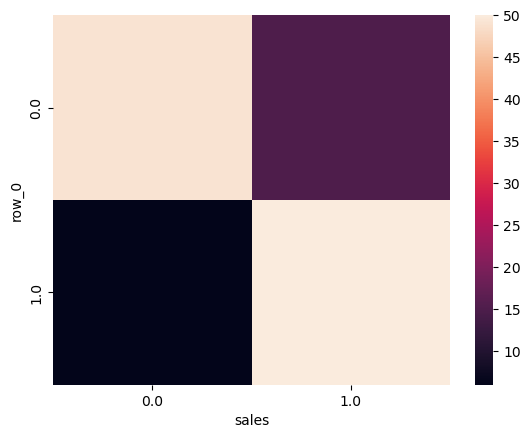

In [36]:
sns.heatmap(pd.crosstab(y_pred, y_test));

In [37]:
print(accuracy_score(y_pred, y_test)*100)

82.5


In [38]:
np.mean(y_pred==y_test)

0.825

### Finding the best parameter by GridSearchCV

In [39]:
params = {'n_estimators': [100,200,300],
         'max_depth' : [10,20,30]}

In [40]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5)

In [41]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [42]:
print(grid.best_params_)

{'max_depth': 30, 'n_estimators': 100}


In [45]:
best_model = RandomForestClassifier(n_estimators=200, max_depth=30)
best_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=200)

In [46]:
y_pred_best = best_model.predict(x_test)

In [47]:
y_pred_best

array([0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0.])

In [48]:
pd.crosstab(y_pred_best,y_test)

sales,0.0,1.0
row_0,,
0.0,51,13
1.0,4,52


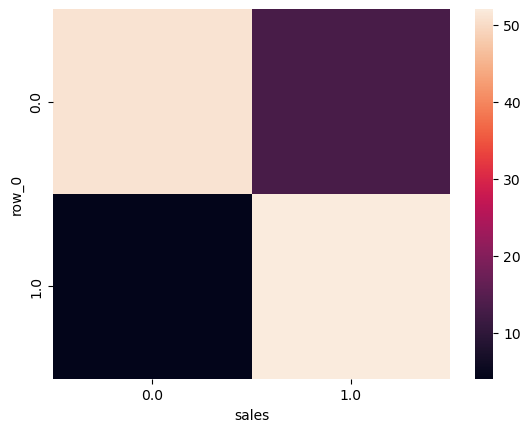

In [49]:
sns.heatmap(pd.crosstab(y_pred_best,y_test));

In [50]:
print(accuracy_score(y_pred_best, y_test)*100)

85.83333333333333
